# The Effects of Monthly Loan Payments and the Employment Status on Prosper Score and Borrower Annual Percentage Rating(APR)

## Investigation Overview

In thi sinvestigation, I wanted to look at how the monthly loan payments and the employment status could affect the prosper score and the borrower APR

## Dataset Overview

The Prosper loan dataset consists of 113937 loan entries with 81 feature3s for each loan spanning the years 2009 to 2014, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
pr = pd.read_csv('prosperLoanData.csv')

In [3]:
# data wrangling, removing features that are not of interest

loans = pr.loc[:,['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
                         'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'AmountDelinquent',
                         'IncomeRange', 'StatedMonthlyIncome',
                         'LoanCurrentDaysDelinquent',
                         'LoanOriginalAmount', 'LoanOriginationDate', 
                         'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors']]

In [4]:
# Change the Listing Creation Date,Closed Date and Loan Origination Date data type to date time using mapping function.

cols_2_extract = loans.columns[[0,3,18]]

loans[cols_2_extract] = loans[cols_2_extract].applymap(lambda x : pd.to_datetime(x, format = '%Y-%m-%d %H:%M:%S.%f'))

In [5]:
# Change the 'Employment Status','Loan Status','Listing Category (numeric)','Borrower State','Occupation' columns to categorical column data type
loans[['ProsperScore','EmploymentStatus','LoanStatus','ListingCategory (numeric)','BorrowerState','Occupation']] = loans[['ProsperScore','EmploymentStatus','LoanStatus','ListingCategory (numeric)','BorrowerState','Occupation']].astype("category")

In [6]:
# Convert Prospe rRating and Income Range into ordered Categorical type
ordinal_var_dict = {'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

## Distribution of Prosper Score

The Prosper Score has a normal distribution with its peak at 4.0, 6.0 and 8.0 respectively

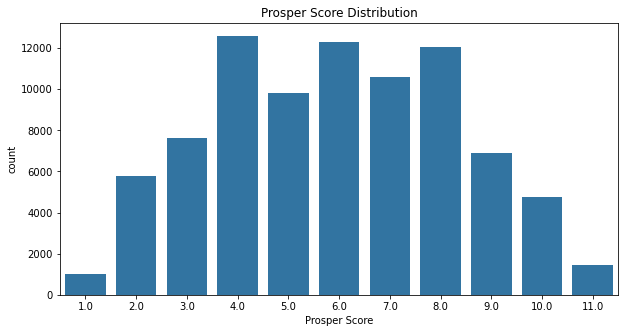

In [7]:
# plotting Prosper Score distribution

colour= sns.color_palette()[0]
plt.figure(figsize=[10,5])
sns.countplot(data= loans, x= 'ProsperScore', color= colour)
plt.xlabel('Prosper Score')
plt.title('Prosper Score Distribution')


plt.show()

## Distribution of Prosper Rating

The prosper rating is normally distributed and most loans has a prosper rating of C.

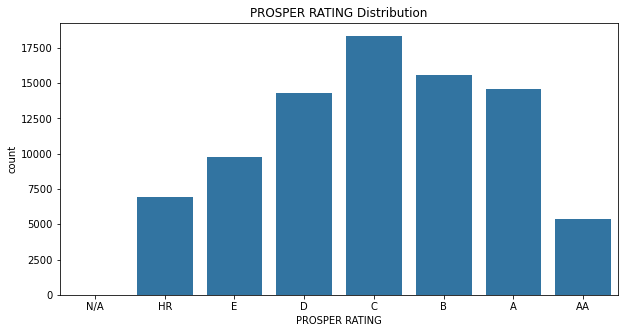

In [8]:
# plotting Prosper Rating Distribution

colour= sns.color_palette()[0]
plt.figure(figsize=[10,5])
sns.countplot(data= loans, x= 'ProsperRating (Alpha)', color= colour)
plt.xlabel('PROSPER RATING')
plt.title('PROSPER RATING Distribution')


plt.show()

## Distribution of Borrower APR

The borrowers's annual peercentage rate is normally distributed with its peak at about 20% per annum. Also we note that there is a rapid increase in frequency before the 35% mark.

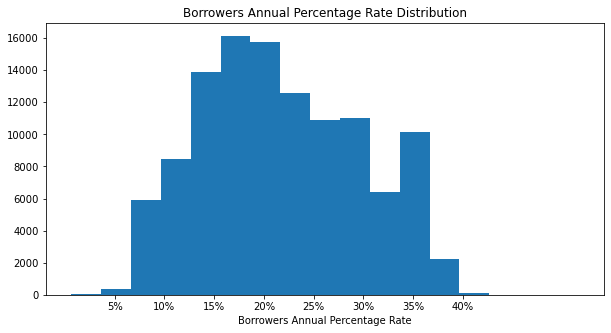

In [9]:
# Plotting the borrower's APR distribution

binsize = 3
bins = np.arange(loans['BorrowerAPR'].min()*100, loans['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10,5])
plt.hist(x = loans['BorrowerAPR']*100, bins= bins)
plt.title('Borrowers Annual Percentage Rate Distribution')
plt.xlabel('Borrowers Annual Percentage Rate')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5%','10%', '15%', '20%', '25%', '30%', '35%', '40%'])

plt.show()

## Distribution of Borrower Rate

The borrower rate is also normally distributed and the borrower rate for most of the loans is between 15% and 20%

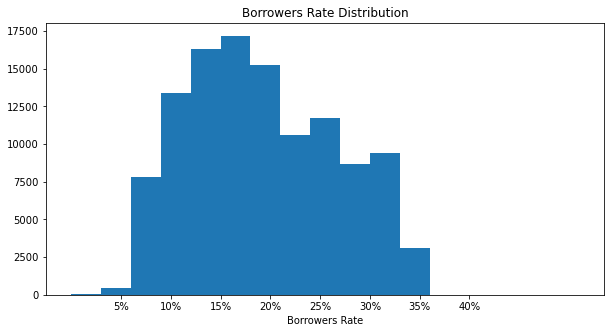

In [10]:
# Plotting the borrower's rate distribution

binsize = 3
bins = np.arange(loans['BorrowerRate'].min()*100, loans['BorrowerRate'].max()*100+binsize, binsize)

plt.figure(figsize=[10,5])
plt.hist(x = loans['BorrowerRate']*100, bins= bins)
plt.title('Borrowers Rate Distribution')
plt.xlabel('Borrowers Rate')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5%','10%', '15%', '20%', '25%', '30%', '35%', '40%'])

plt.show()

## Prosper Score and Rate Against Borrower APR and Rate

The Borrower APR and the Borrower rate has a negative correlation with the Prosper rating in the sense that as the Borrower rate or APR increase, the prosper rating.

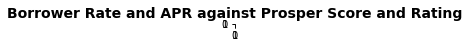

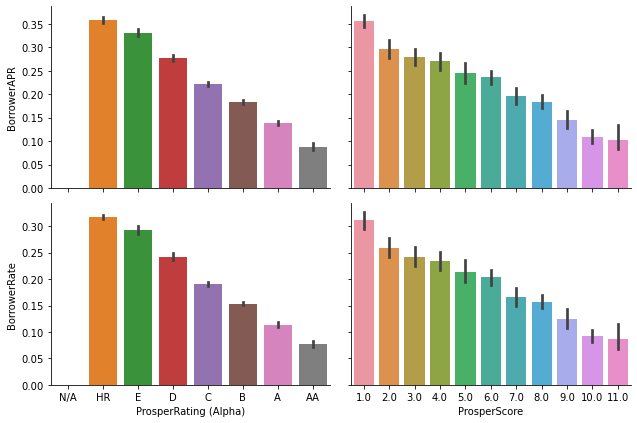

In [11]:
# checking the correlation between the borrower rate and APR against the prosper rating and score


loans_samp = loans.sample(n=500, replace = False)
plt.figure(figsize = [0, 0])
plt.title('Borrower Rate and APR against Prosper Score and Rating', fontsize = 14, weight = 'bold')
g = sns.PairGrid(data = loans_samp, y_vars = ['BorrowerAPR','BorrowerRate'], x_vars = ['ProsperRating (Alpha)','ProsperScore'],
                height = 3, aspect = 1.5)
g.map(sns.barplot)

plt.show();

## Prosper Score and Rating against Monthly Loan Payment and Stated Monthly Income

The mean prosper rating together with the prosper score increases as the monthly loan payment increases likewise the stated monthly income

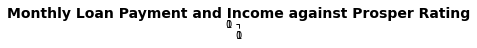

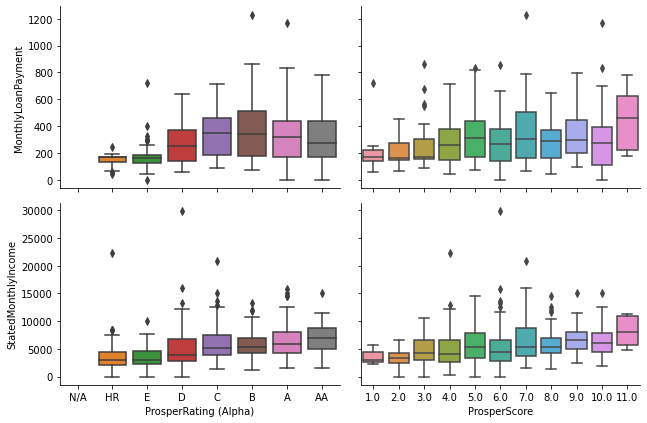

In [12]:
# checking the relationship between the monthly loan payment, stated monthly income against the prosper rating 


plt.figure(figsize = [0, 0])
plt.title('Monthly Loan Payment and Income against Prosper Rating', fontsize = 14, weight = 'bold')
g = sns.PairGrid(data = loans_samp, y_vars = ['MonthlyLoanPayment','StatedMonthlyIncome'], x_vars = ['ProsperRating (Alpha)','ProsperScore'],
                height = 3, aspect = 1.5)
g.map(sns.boxplot)
plt.show();

## Employment Status VS. Borrower APR

The unemployed have higher borrower APR than the employed

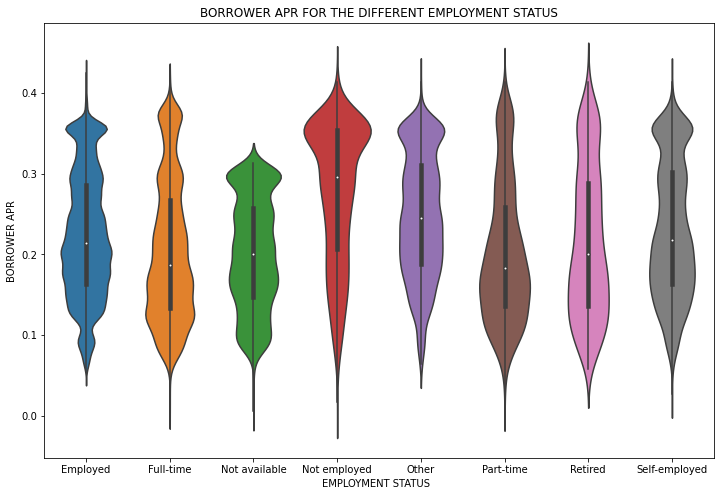

In [13]:
# checking the relationship between the employment status and the borrower APR

plt.figure(figsize = [12, 8])

sns.violinplot(data = loans,x='EmploymentStatus', y='BorrowerAPR');
plt.title('BORROWER APR FOR THE DIFFERENT EMPLOYMENT STATUS')
plt.xlabel('EMPLOYMENT STATUS  ');
plt.ylabel('BORROWER APR');


In [18]:
!jupyter nbconvert prosper_loan_data_exploration_Part_2.ipynb --to slides --post serve --no-input --no-prompt

^C
